# Abortion rates in Europe
### What's the correlation between percentage of catholic population and the abortion rate
Rate = abortions per 1000 births

1. Abortions per 1000 births in Europe
1. Development
1. Scatter Plot with. y = Total number abortions per 1000 births, x = percentage of non-catholic population

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

## Abortion data

In [2]:
df = pd.read_csv('d/abortionEU.csv')
df = df[df['Year']==2015]
del df['Unnamed: 4']
del df['Unnamed: 3']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 35 to 1420
Data columns (total 3 columns):
Country    40 non-null object
Year       40 non-null int64
Count      40 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [33]:
sort = df.sort_values(by='Count', ascending=False).reset_index()
del sort['index']
sort

,Country,Year,Count
0,GEO,2015,424
1,BGR,2015,421
2,RUS,2015,385
3,ROU,2015,378
4,MDA,2015,364
5,EST,2015,354
6,HUN,2015,340
7,SWE,2015,331
8,ARM,2015,270
9,FRA,2015,268


# Development all

In [5]:
a = pd.read_csv('d/abortionEU.csv')
country_list = list(set(list(a['Country'])))
del a['Unnamed: 4']
del a['Unnamed: 3']

In [6]:
years = list(set(list(a['Year'])))

In [7]:
round(a[a['Year']==1970]['Count'].mean(), 1)

347.2

In [34]:
lst = []
for elem in years:
    value = round(a[a['Year']==elem]['Count'].mean(), 1)
    mini_dict = {'Year':elem,
                 'Value': value}
    lst.append(mini_dict)

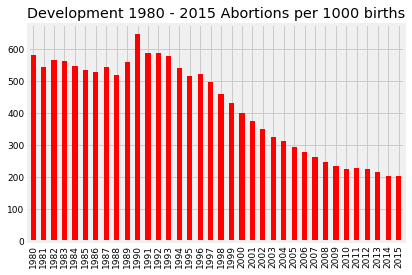

In [35]:
AvgAbortions = pd.DataFrame(lst)
AvgAbortions = AvgAbortions[AvgAbortions['Year']> 1979] #not enough before 1980
AvgAbortions = AvgAbortions[AvgAbortions['Year']< 2016] #not enough data after 2015

ax = AvgAbortions['Value'].plot(kind='bar', figsize=(6,4), fontsize=9, color='red')
ax.set_xticklabels(list(AvgAbortions['Year']))
ax.set_title('Development 1980 - 2015 Abortions per 1000 births')
plt.savefig('p/02gesamtentwicklung.pdf')

# Indivual countries

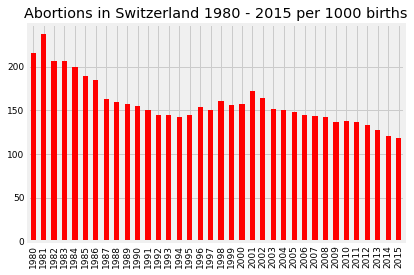

In [36]:
ax = a[a['Country']=='CHE']['Count'].plot(kind='bar', figsize=(6,4), fontsize=9, color='red')
ax.set_xticklabels(list(a[a['Country']=='CHE']['Year']))
ax.set_title('Abortions in Switzerland 1980 - 2015 per 1000 births')
plt.savefig('p/03schweiz.pdf')

## All countries

In [37]:
countrycodes = list(set(a['Country']))
len(countrycodes) / 3

16.333333333333332

In [38]:
countrycodes.remove('SMR')
countrycodes.remove('MLT')
countrycodes.remove('AND')

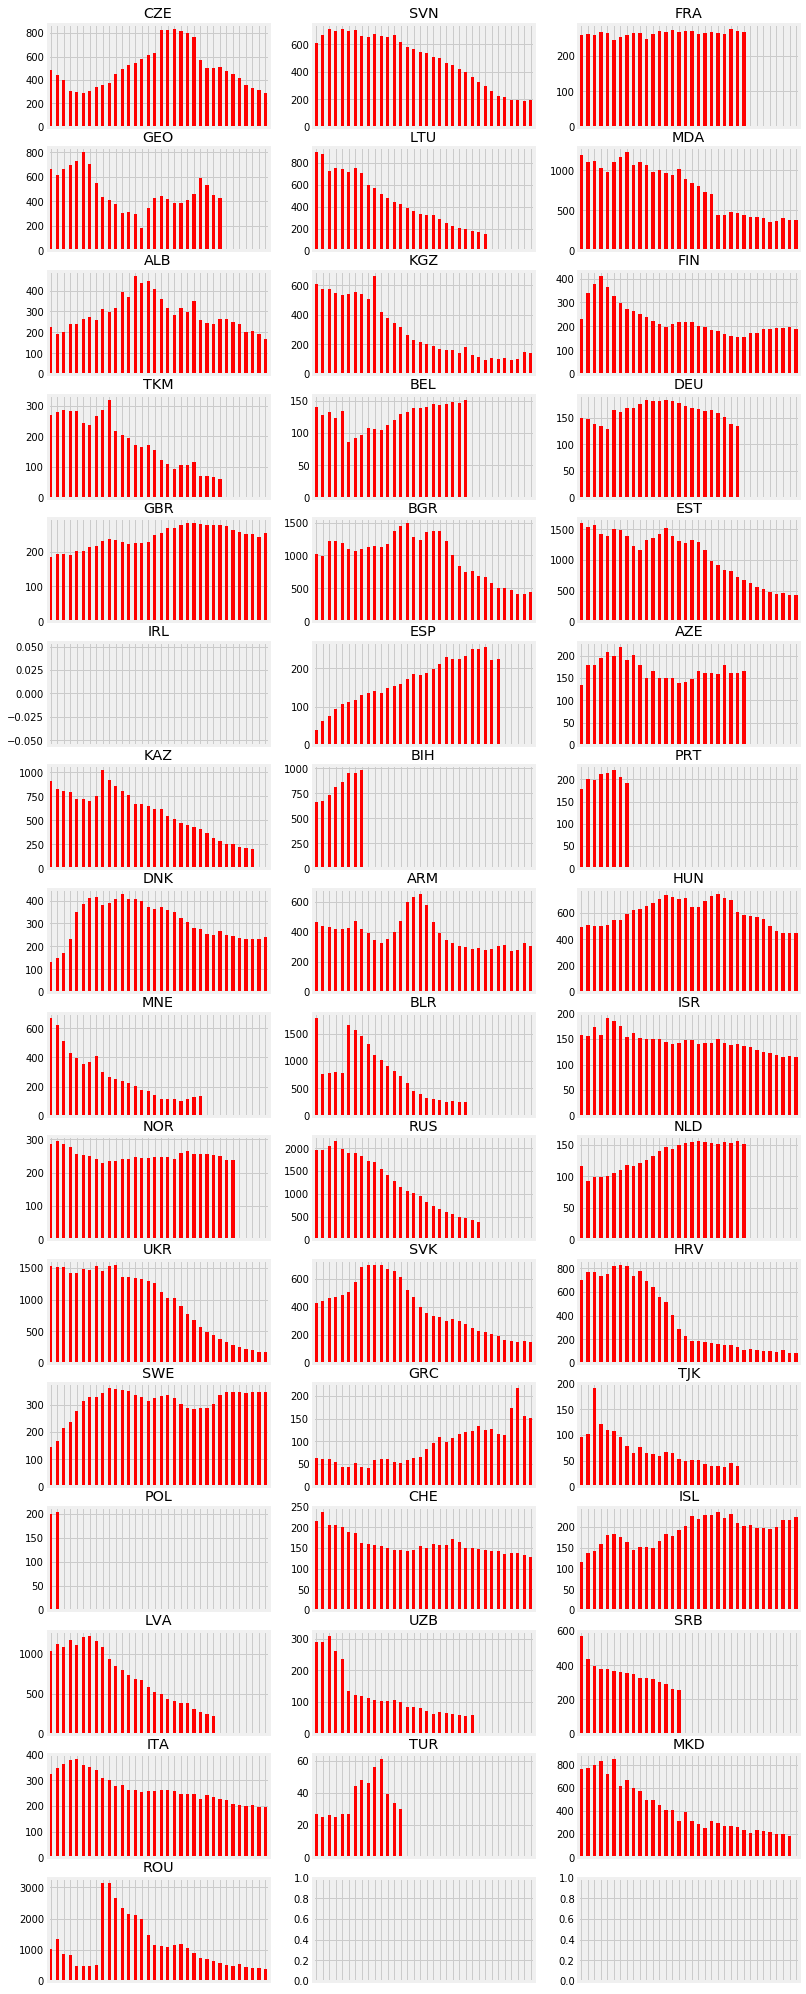

In [39]:
fig, axes = plt.subplots(nrows=16, ncols=3, sharex=True, sharey=False, figsize=(12,36))
axes_list = [item for sublist in axes for item in sublist] 

for country in countrycodes: 
    ax = axes_list.pop(0)
    ax.set_title(country.split(',')[0])
    ax = a[a['Country']==country].sort_values(by='Year')['Count'].plot(kind='bar', ax=ax, legend=False, color='red')
    ax.set_xticklabels([])
    #ax.set_title('Abortions in ' + countrycodes + ' 1980 - 2015 per 1000 births')

plt.savefig('p/04verlaufalleländer.pdf')

In [40]:
a[a['Country']=='BIH'].sort_values(by='Year')

,Country,Year,Count
161,BIH,1980,661
162,BIH,1983,677
163,BIH,1984,731
164,BIH,1985,811
165,BIH,1986,860
166,BIH,1987,958
167,BIH,1988,958
168,BIH,1989,981


## Country Codes

In [ ]:
c = pd.read_csv('d/countrycodes.csv')

In [ ]:
c.head()

In [ ]:
df_ = df.merge(c, left_on='Country', right_on='ISO-3166-3')

In [ ]:
df_.info()

## Non-Catholics

In [ ]:
pop = pd.read_csv('d/Population.csv')
cath = pd.read_csv('d/catholics.csv')
nochurch = pd.read_csv('d/NoChurch.csv')

In [ ]:
cath_ = pop.merge(cath, left_on='Country', right_on='Country')
cath_['Percent of None Cath'] = round(((cath_['Catholics'] / cath_[' Population'] * 100)-100)*-1, 1)

## Non-Catholics and Abortions

In [ ]:
df_ = df_.merge(cath_, left_on='Country / Territory', right_on='Country')

In [ ]:
df_.plot(kind='scatter', x='Percent of None Cath', y='Count')

## No-Church and Abortions

In [ ]:
nochurch_ = pop.merge(nochurch, left_on='Country', right_on='Country')
nochurch_['Percent of no Church'] = round((nochurch_[' Population_y'] / nochurch_[' Population_x'] * 100), 1)
df_ = df_.merge(nochurch_, left_on='Country / Territory', right_on='Country')
df_.plot(kind='scatter', x='Percent of no Church', y='Count')